# Exploratory data analysis
 * Our goal here is to learn and find more about the dataset
 * Things to look at:        
   -Count how many records belong to each disease.   
   -For each symptom column, count how many times it appears across all records.
 * Since our disease column, we haven't encoded it yet, not much analysis
  

In [16]:
# First, we will import all the tools we need for EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
#import the dataset
dataset = pd.read_csv("clean_dataset.csv")

#View the first 5 rows 
dataset.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,glaucoma,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Dataset looks good, so we want to know more about the target column (diseases)
 * Count how many records belong to each disease.
 * A `bar and line graph` will be used to visualize the number of records of each disease

In [21]:
#count records in each disease
disease_counts = dataset["diseases"].value_counts()

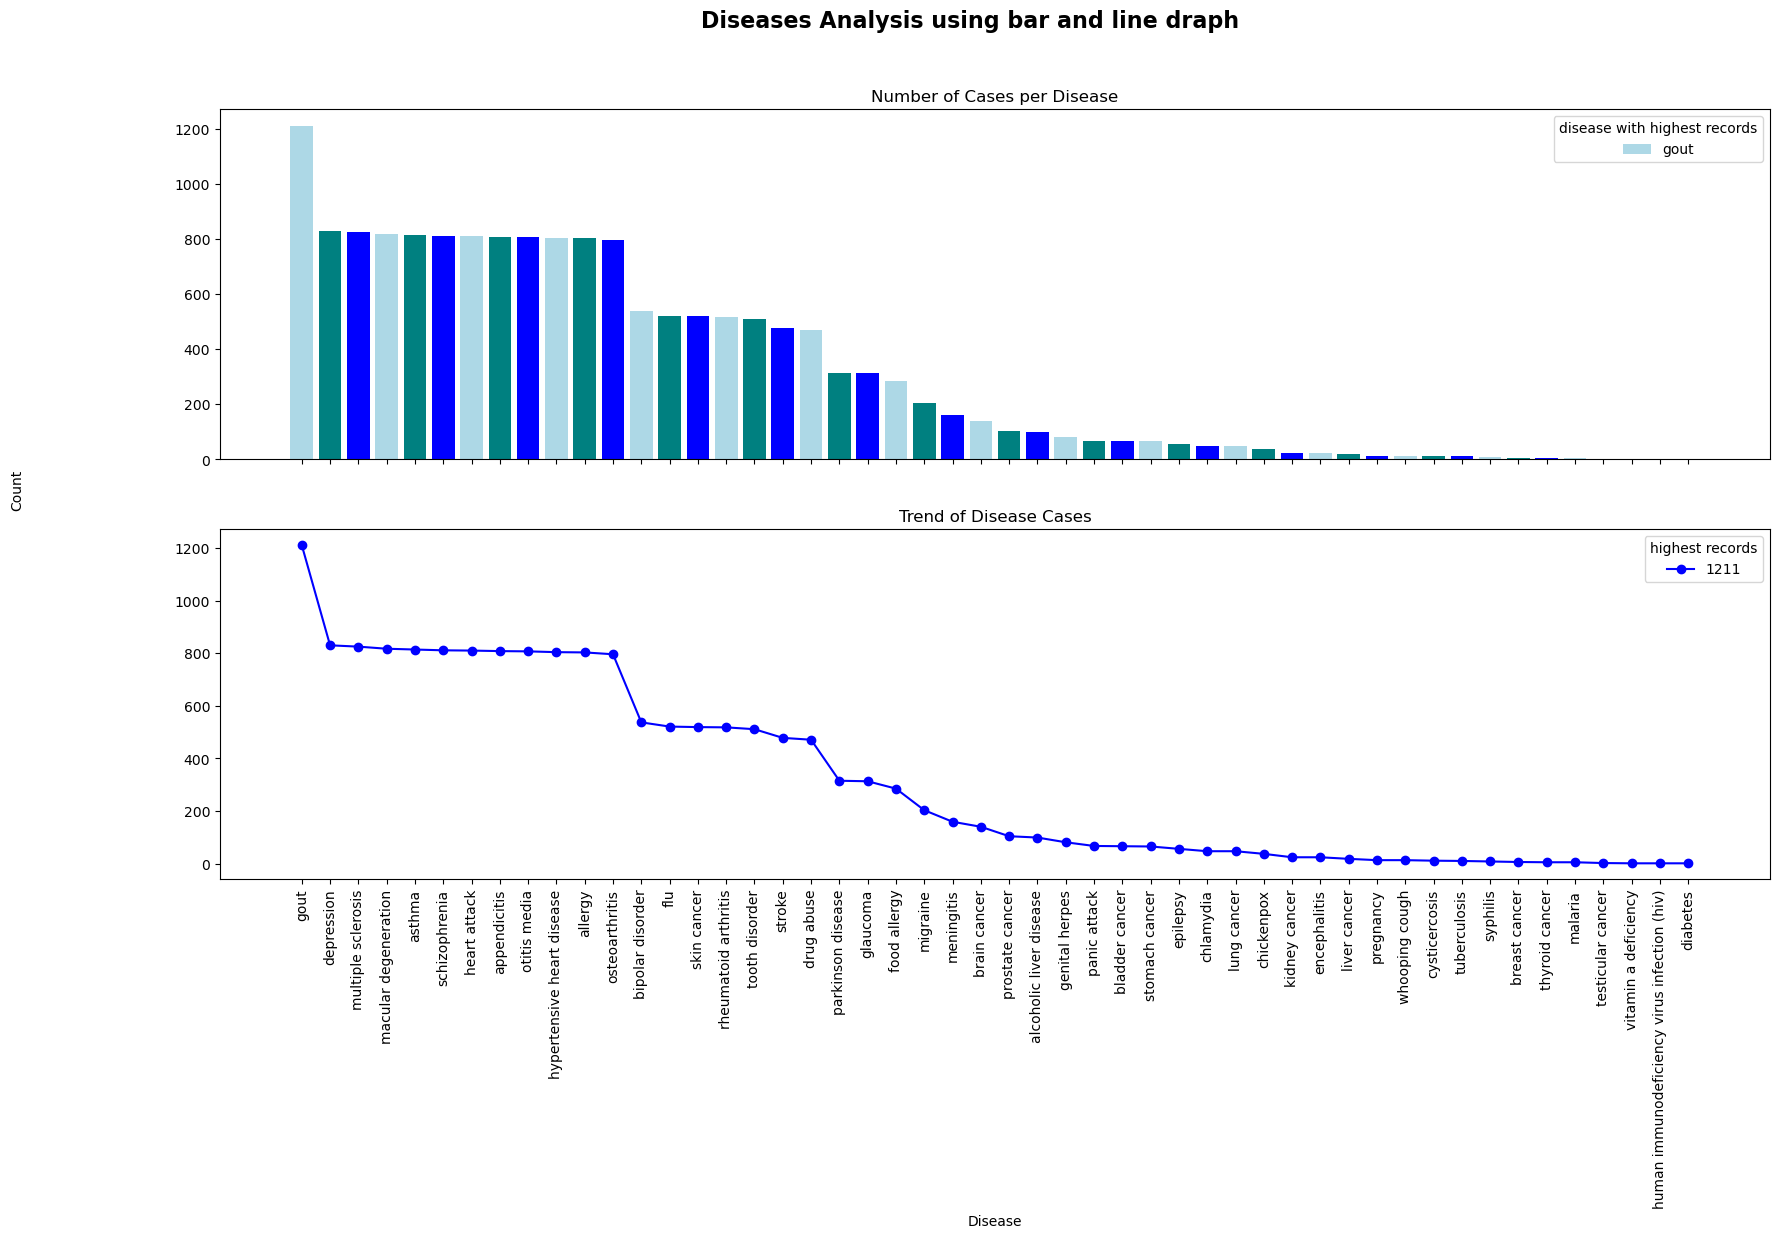

In [22]:

#Create figure (plot) with 2 axes
fig , ((ax0,ax1)) = plt.subplots(nrows=2,
                                 ncols=1,
                                 sharex=True,
                                 figsize = (20,10,))

#add data,titles and legend to axes 0
bar = ax0.bar(disease_counts.index,
              disease_counts.values,
              color=['LightBlue','Teal','blue'])
ax0.set(title = "Number of Cases per Disease")
ax0.legend(disease_counts.index,title="disease with highest records")


#add data, titles, set position, set label with rotation, and legend to axes 1
dotted = ax1.plot( disease_counts.index,
                  disease_counts.values,
                  marker='o', linestyle='-',
                  color='blue')
ax1.set(title="Trend of Disease Cases",xlabel="Disease")
ax1.legend(disease_counts.values,title="highest records")
ax1.set_xticks(range(len(disease_counts.index))) 
ax1.set_xticklabels(disease_counts.index, rotation=90)

#Title the figure
fig.supylabel("Count",fontsize=10)
fig.suptitle("Diseases Analysis using bar and line draph" ,fontsize = 16,fontweight="bold");

## Now we will look at the symptoms that appeared most frequently across all records
    1 = symptom present
    0 = symptom absent
* We will visualize the 15 most common symptoms using a histogram

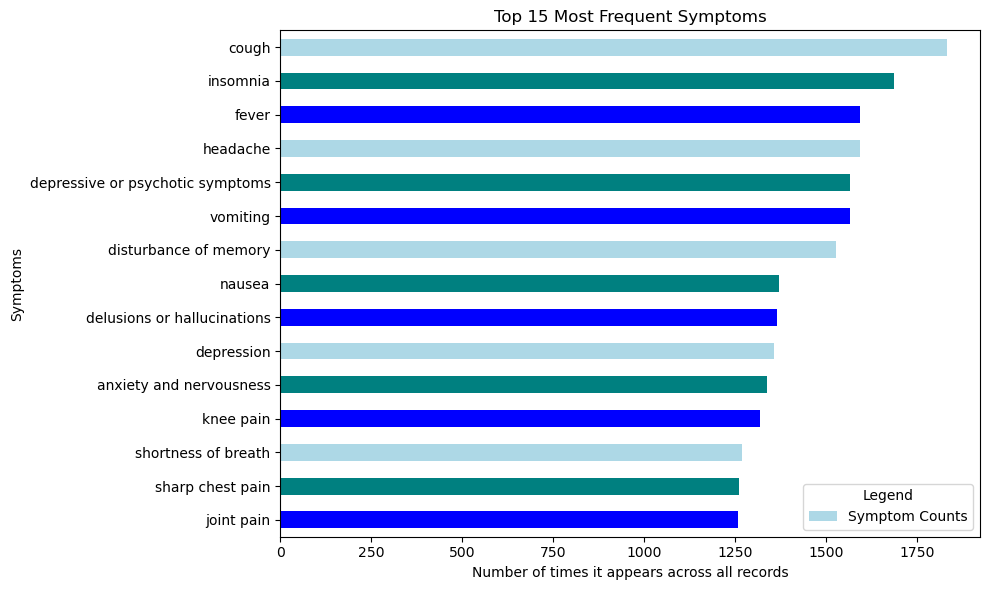

In [29]:
# Sum symptoms across all records
symptom_counts = dataset.iloc[:, 1:].sum().sort_values(ascending=False)

# Select top 15 symptoms
top_symptoms = symptom_counts.head(15)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
top_symptoms.plot(kind='barh', 
                  color=['lightblue', 'teal', 'blue'] * 5)  
plt.xlabel("Number of times it appears across all records")
plt.ylabel("Symptoms")
plt.title("Top 15 Most Frequent Symptoms")

plt.gca().invert_yaxis() 
plt.legend(["Symptom Counts"], title="Legend")

plt.tight_layout()
plt.show()
